# Homework #3 (Due 09/30/2021, 11:59pm)
## Sampling and Monte Carlo Integration

**AM 207: Advanced Scientific Computing**<br>
**Instructor: Weiwei Pan**<br>
**Fall 2021**

**Name: Jiahui Tang**

**Students collaborators: Xin Zeng, Yujie Cai**

### Instructions:

**Submission Format:** Use this notebook as a template to complete your homework. Please intersperse text blocks (using Markdown cells) amongst `python` code and results -- format your submission for maximum readability. Your assignments will be graded for correctness as well as clarity of exposition and presentation -- a “right” answer by itself without an explanation or is presented with a difficult to follow format will receive no credit.

**Code Check:** Before submitting, you must do a "Restart and Run All" under "Kernel" in the Jupyter or colab menu. Portions of your submission that contains syntactic or run-time errors will not be graded.

**Libraries and packages:** Unless a problems specifically asks you to implement from scratch, you are welcomed to use any `python` library package in the standard Anaconda distribution.

In [1]:
### Import basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
from scipy.stats import uniform, norm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Problem Description

Let $X$ be a random variable with distribution described by the following pdf:

$$
f_X(x) = \begin{cases}
\frac{1}{12}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9), &7< x\leq 9\\
0, &otherwise
\end{cases}
$$

Let $h$ be the following function of the random variable $X$:

$$
h(x) = 7 * \mathrm{exp}\left\{\frac{(x-4)^2}{-2}\right\} + 3 * \mathrm{exp}\left\{\frac{(x-8)^2}{-2 * 0.7^2}\right\}
$$

Our goal is to compute the expected value of $h(X)$:
$$
I = \mathbb{E}_{X\sim f_X}\left[h(X)\right] = \int_{\Omega} h(x) f_X(x)dx,
$$
where $\Omega$ is the domain of $f_X$.

---
## Part I. Implement Some Monte Carlo Estimates

Approximate $\mathbb{E}_{X\sim f_X}[h(X)]$ using the Monte Carlo integration methods and your choice of a reasonable fixed $S$ (for rejection sampling, this means run the algorithm $S$ times):


1. ***Inverse CDF Sampling*** and naive Monte Carlo estimation.<br><br>

2. ***Rejection Sampling*** and naive Monte Carlo estimation, using each of the following

  - a uniform proposal distribution
  - a normal proposal distribution 

  and your choice of reasonable parameters for the proposal distributions.<br><br>
  
3. ***Importance Sampling*** using each of the following

  - a uniform importance distribution 
  - a normal importance distribution

  and your choice of reasonable parameters for the importance distributions.<br><br>
  
2. ***Stratified Sampling*** using 4 strata, whose end points are given by
$$
[1, 3, 5, 7, 9].
$$
Use inverse cdf sampling on each stratum.

<font color='#00007B'>
    
# Q1.Inverse CDF Sampling
    
**Answer:** 
CDF could be written as   
$$
F_X(m)= \int_{1}^m f_X(x)dx, \quad m\in \mathbb{R}
$$

And since
$$
f_X(x) = \begin{cases}
\frac{1}{12}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9), &7< x\leq 9\\
0 &otherwise
\end{cases}
$$

As we need to consider CDF for each section, For example, for integrating  $3< x\leq 5$,
    
\begin{aligned}
F_X(x) &= \int_{3}^x f_X(u)du  + \int_{1}^3 f_X(x)dx + 0 \\
&= \int_3^x -\frac{1}{12} (u-5) d u + \frac{(x-1)^2}{24} \Big|_1^3 \\
&= -\frac{(x-5)^2}{24} + \frac{1}{3} \quad x\in [3, 5]
\end{aligned}
    

We could do the similar for all of the sections, and get the cdf of random variable $X$
Find CDF:

* for $1 \le x \le 3, F_X(x) = \int_1^x \frac{1}{12} (u-1) d u = \frac{(x-1)^2}{24}$

* for $3 < x \le 5, F_X(x) = \int_3^x -\frac{1}{12} (u-5) d u + \frac{(x-1)^2}{24} \Big|_1^3= -\frac{(x-5)^2}{24} + \frac{1}{3}$

* for $5 < x \le 7, F_X(x) = \int_5^x \frac{1}{6} (u-5) d u + F_{x \in (3,5]}(x) \Big|_3^5 + F_{x \in [1,3]}(x) \Big|_1^3= \frac{(x-5)^2}{12} + \frac{1}{3}$

* for $7 < x \le 9, F_X(x) = \int_7^x -\frac{1}{6} (u-9) d u + F_{x \in (5,7]}(x) \Big|_5^7 + F_{x \in (3,5]}(x) \Big|_3^5 + F_{x \in [1,3]}(x) \Big|_1^3= -\frac{(x-9)^2}{12} + 1$

* for $ x > 9, F_X(x) = 1$

Thus we can get:
$$
F_X(x) = \begin{cases}
0, &-\infty < x < 1 \\
\frac{(x-1)^2}{24}, &1\leq x\leq 3\\
-\frac{(x-5)^2}{24} + \frac{1}{3}, &3< x\leq 5\\
\frac{(x-5)^2}{12} + \frac{1}{3}, &5< x\leq 7\\
-\frac{(x-9)^2}{12} + 1, &7< x\leq 9\\
1 &9 < x < \infty
\end{cases}
$$

And using wolfram alpha, we get the inverses CDFs are 
$$
F_X^{-1}(y) = \begin{cases}
1 + 2 \sqrt{6} \sqrt{y}, &0 \le y \le \frac{1}{6}\\
5 - 2 \sqrt{2} \sqrt{1-3y}, &\frac{1}{6} < y \le \frac{1}{3}\\
5 + 2 \sqrt{3y-1}, &\frac{1}{3} \le y < \frac{2}{3}\\
9 - 2 \sqrt{3} \sqrt{1-y}, &\frac{2}{3} < y \le 1\\
\end{cases}
$$ 
    
    
    

<font color='#00007B'>

By naive monte carlo estimation of integrals, we could get
$$
I = \mathbb{E}_{X\sim f_X}\left[h(X)\right] = \int_{\Omega} h(x) f_X(x)dx
$$
could be approximated by
$$
\hat{I} = \mathbb{E}_{X\sim f_X}\left[ h(X)\right] \approx \sum_{s=1}^{S} h(\theta_s),\; \theta_s\sim f_X.
$$

In [2]:
# h(x)

def h(x):
    return 7*np.exp((x-4)**2/-2) + 3*np.exp((x-8)**2/(-2*0.7**2))

# inverse CDF
def F_inv(y):
    if y >= 0 and y <= 1./6:
        return 1 + 2 * np.sqrt(6 * y)
    elif y > 1./6 and y <= 1./3:
        return 5 - 2 * np.sqrt(2 * (1 - 3 * y))
    elif y > 1./3 and y <= 2./3:
        return 5 + 2 * np.sqrt(3 * y - 1)
    elif y > 2./3 and y <= 1.:
        return 9 - 2 * np.sqrt(3 * (1 - y))
    else:
        return np.nan

# number of samples
S = 5000
def inverse_cdf_sampling(S):
    uniform = np.random.uniform(low=0, high=1, size=S)
    samples = np.array([F_inv(i) for i in uniform])
    # estimate by taking sample mean
    monte_carlo_estimate = np.mean(h(samples))
    return samples, monte_carlo_estimate

inverse_cdf_samples, monte_carlo_estimate = inverse_cdf_sampling(S)

print("Naive Monte Carlo estimation of h(x) is {}".format(round(monte_carlo_estimate, 4)))

Naive Monte Carlo estimation of h(x) is 2.4703


<font color='#00007B'>
    
# Q2.Rejection Sampling
    

In [3]:
# pdf of f
def f(x):
    if x >=1 and x <= 3:
        return 1.0/12 * (x - 1)
    elif 3 < x and x <= 5:
        return -1.0/12 * (x - 5)
    elif 5 < x and x <= 7:
        return 1.0/6 * (x - 5)
    elif 7 < x and x <= 9:
        return -1.0/6 * (x - 9)
    else:
        return 0

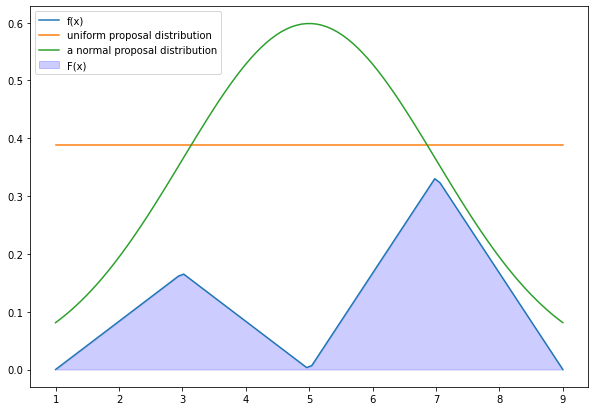

In [4]:
x = np.linspace(1,9,100)

f_vec = np.vectorize(f)
m1, m2 = 3.5, 3

plt.figure(figsize = (10,7))
plt.plot(x, f_vec(x), label='f(x)')
plt.plot(x, m1*uniform(loc=1,scale=9).pdf(x), label='uniform proposal distribution')
plt.plot(x, m2*norm(loc=5,scale=2).pdf(x), label='a normal proposal distribution')
plt.fill_between(x, f_vec(x), color='blue', alpha=0.2, label='F(x)')

plt.legend(loc="upper left")
plt.show()


In [5]:
#scaling constant
M = 3

#total number of samples we want
N = 5000

#repeat rejection sampling until total number of samples is attained
def rejection_sampling(target_pdf, proposal_pdf, S = 5000, M = 3, normal_distribution = True):
    samples = []
    mean_estimate = 0
    for i in range(S):
        #sample x from proposal distribution
        if normal_distribution:
            proposed_sample = norm.rvs(loc=5,scale=2)
        else:
            proposed_sample = uniform.rvs(loc=1,scale=9)
        
        #sample a random height at x
        u = np.random.uniform(0, 1)
        #accept if height is below target distribution
        if u < target_pdf(proposed_sample) / (M * proposal_pdf(proposed_sample)):
            samples.append(proposed_sample)
    samples = np.array(samples)
    mean_estimate = np.mean(h(samples))
    return samples, mean_estimate

In [6]:
target_pdf = f_vec
proposal_pdf_uniform = uniform(loc=1,scale=9).pdf
proposal_pdf_normal = norm(loc=5,scale=2).pdf
m1, m2 = 3.5, 3
S=5000

# rejection sampling for uniform
uniform_rej_sampling, uniform_rej_estimate = rejection_sampling(target_pdf, proposal_pdf_uniform, S = S, M = m1, normal_distribution = False)

# rejection sampling for normal

normal_rej_sampling, normal_rej_estimate= rejection_sampling(target_pdf, proposal_pdf_normal, S = S, M = m2, normal_distribution = True)


print(f'Uniform Rejection Sampling Acceptance Rate: {uniform_rej_sampling.size/S*100:.2f}%')
print('the naive Monte Carlo estimation mean using uniform: {} '.format(uniform_rej_estimate))

print('========================')

print(f'Normal Rejection Sampling Acceptance Rate: {normal_rej_sampling.size/S*100:.2f}%')
print('the naive Monte Carlo estimation mean using normal: {} '.format(normal_rej_estimate))


Uniform Rejection Sampling Acceptance Rate: 28.30%
the naive Monte Carlo estimation mean using uniform: 2.5009348361868335 
Normal Rejection Sampling Acceptance Rate: 34.74%
the naive Monte Carlo estimation mean using normal: 2.388770250683561 


<font color='#00007B'>
    
# Q3.Importance Sampling

<font color='#00007B'>

From lecture notes, importance sampling is that 
we fix a total sample size $S$. The ***importance sampling Monte Carlo estimator*** is
$$
\widehat{I}_{\text{IS}} = \frac{1}{S}\sum_{s=1}^S \frac{p(\theta_s|Y)}{q(\theta_s)}f(\theta_s), \; \theta_s \sim q(\theta_s)
$$
We call $q$ is the ***importance distribution***, $p$ the ***nominal distribution*** and $\frac{p(\theta_s|Y)}{q(\theta_s)}$ the ***importance weight***.

Which should be 
$$
\widehat{I}_{\text{IS}} = \frac{1}{S}\sum_{s=1}^S \frac{f_X(x_s)}{q(x_s)} h(x_s),\; x_s \sim q(X)
$$

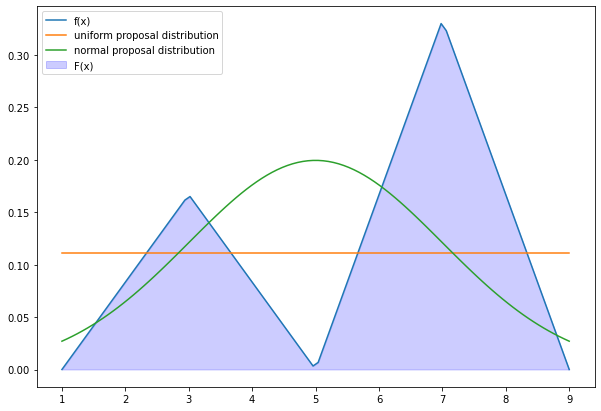

In [7]:
x = np.linspace(1,9,100)
f_vec = np.vectorize(f)
normal_sampler = norm(loc=5, scale=2).pdf
uniform_sampler = uniform(loc=1,scale=9).pdf

plt.figure(figsize = (10,7))
plt.plot(x, f_vec(x), label='f(x)')
plt.plot(x, uniform_sampler(x), label='uniform proposal distribution')
plt.plot(x, normal_sampler(x), label='normal proposal distribution')
plt.fill_between(x, f_vec(x), color='blue', alpha=0.2, label='F(x)')

plt.legend(loc="upper left")
plt.show()

In [8]:
#total number of samples we want
N = 5000

def importance_sampling(target_pdf, proposal_pdf, S = 5000, normal_distribution = True):
    samples, imp_weight = [], []
    for i in range(S):
        #sample x from proposal distribution
        if normal_distribution:
            theta = norm.rvs(loc=5,scale=2)
        else:
            theta = uniform.rvs(loc=1,scale=9)
        
        #compute the importance weights for the sample
        weights = target_pdf(theta)/proposal_pdf(theta)
        
        # compute a single sample estimation
        samples.append(weights * h(theta))
        imp_weight.append(weights)
    samples = np.array(samples)
    imp_weight = np.array(imp_weight)
    estimate = np.mean(samples)
    return samples, estimate, imp_weight

In [9]:
target_pdf = f_vec
proposal_pdf_uniform = uniform(loc=1,scale=9).pdf
proposal_pdf_normal = norm(loc=5,scale=2).pdf
S=5000

# rejection sampling for uniform
uniform_imp_sampling, uniform_imp_mean, uniform_imp_weight= importance_sampling(target_pdf, proposal_pdf_uniform, S = S, normal_distribution = False)

# rejection sampling for normal

normal_imp_sampling, normal_imp_mean, normal_imp_weight = importance_sampling(target_pdf, proposal_pdf_normal, S = S, normal_distribution = True)


print('the naive Monte Carlo estimation mean using uniform: {} '.format(uniform_imp_mean))

print('========================')

print('the naive Monte Carlo estimation mean using normal: {} '.format(normal_imp_mean))


the naive Monte Carlo estimation mean using uniform: 2.394069795434312 
the naive Monte Carlo estimation mean using normal: 2.4700233840771344 


<font color='#00007B'>
    
# Q4.Stratified Sampling
    

## The Stratified Sampling Monte Carlo Estimator




<font color='#00007B'>

Fix a function $f(\theta)$, where $\theta$ is a random variable over the domain $\Theta$ whose pdf is $p(\theta|Y)$. Then the integral for $\mathbb{E}_{\theta|Y}[f(\theta)]$ can be decomposed as
$$
\mathbb{E}_{\theta|Y}[f(\theta)] = \int f(x)p(x) dx = \sum_{m=1}^M \int_{\Theta_m} f(\theta) p(\theta) d\theta
$$
where $\bigcup_{m=1}^M\Theta_m = \Theta$ and $\Theta_m \cap \Theta_{m'} = \emptyset$ if $m\neq m'$. 

To make $p(\theta)$ a pdf over $\Theta_{m'}$ we need to normalize it, i.e. 
$$
\frac{p(\theta)}{w_m},\quad w_m = \int_{\Theta_m} p(\theta)d\theta.
$$
We can then rewrite the integral for $\mathbb{E}_{\theta|Y}[f(\theta)]$ again
$$
\mathbb{E}_{\theta|Y}[f(\theta)] = \sum_{m=1}^M \int_{\Theta_m} w_m f(\theta) \left(\frac{p(\theta)}{w_m}\right) d\theta = \sum_{m=1}^M w_m \mathbb{E}_{\theta \sim \frac{p(\theta)}{w_m}\mathbb{1}_{\Theta_m}}[f(\theta)],
$$
where $\mathbb{1}_{\Theta_m}$ is the indicator function for the set $\Theta_m$. 

Fix a total sample size $S$. Let $\widehat{I}_m$ be the Monte Carlo estimate of $\mathbb{E}_{\theta \sim \frac{p(\theta)}{w_m}\mathbb{1}_{\Theta_m}}[f(\theta)]$ estimated with $S_m = w_m * S$ samples, the ***stratified sampling Monte Carlo estimator*** is
$$
\widehat{I}_{\text{SS}} = \sum_{m=1}^M w_m \widehat{I}_m.
$$
since $\mathrm{Var}\left[\widehat{I}_m\right]$ is lower than $\mathrm{Var}\left[\widehat{I}\right]$, we hope that $\mathrm{Var}\left[\widehat{I}_{\text{SS}}\right]$ is also lower.

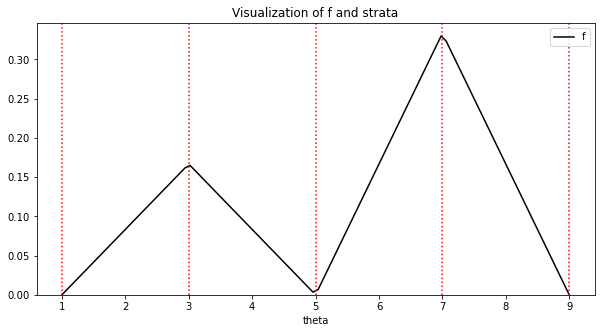

In [10]:
#define the end points of the strata
strata = [1,3,5,7,9]

x = np.linspace(1, 9, 100)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, f_vec(x), color='black', label='f')
for stratus in strata:
    ax.axvline(x=stratus, linestyle=':', color='red')
ax.set_title('Visualization of f and strata')
ax.set_xlabel('theta')
ax.set_ylim(0)
ax.legend(loc='best')
plt.show()

<font color='#00007B'>


And since from 1.1, we have 
$$
f_X(x) = \begin{cases}
\frac{1}{12}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9), &7< x\leq 9\\
0 &otherwise
\end{cases}
$$

and its CDF

$$
F_X(x) = \begin{cases}
0, &-\infty < x < 1 \\
\frac{(x-1)^2}{24}, &1\leq x\leq 3\\
-\frac{(x-5)^2}{24} + \frac{1}{3}, &3< x\leq 5\\
\frac{(x-5)^2}{12} + \frac{1}{3}, &5< x\leq 7\\
-\frac{(x-9)^2}{12} + 1, &7< x\leq 9\\
1 &9 < x < \infty
\end{cases}
$$


And from the graph and calculate CDF, we could see the weightage of 4 strata by calculating the triangle area of 4 sections divided by $[1,3,5,7,9]$ are 

$$[\frac{1}{6},\frac{1}{6},\frac{1}{3}, \frac{1}{3}]$$ 

respectively.


Next, to make make $f_X(x)$ a pdf over $X_{m'}$ we need to normalize it over weightage.
$$
\frac{f_X(x)}{X_{m'}}  = \begin{cases}
\frac{1}{12}(x-1)* 6 = \frac{1}{2}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5) * 6 = -\frac{1}{2}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5) * 3 = \frac{1}{2}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9) * 3 = -\frac{1}{2}(x-9) , &7< x\leq 9\\
0 &otherwise
\end{cases}
$$

<font color='#00007B'>

Next, we find the cdf of random variable $X$ normalized pdf
    
Here, for example, for $3 < x \le 5$ inverse cdf, we shouldn't add $\frac{(x-1)^2}{4} \Big|_1^3$ from $1 \le x \le 3$ , as normalized pdf is not technically a PDF (they don't sum up to 1), it is a pdf times weight mulitplier.
    
   
    

* for $1 \le x \le 3, F_X(x) = \int_1^x \frac{1}{2} (u-1) d u = \frac{(x-1)^2}{4}$

* for $3 < x \le 5, F_X(x) = \int_3^x -\frac{1}{2} (u-5) d u = -\frac{(x-5)^2}{4} + 1$

* for $5 < x \le 7, F_X(x) = \int_5^x \frac{1}{2} (u-5) d u = \frac{(x-5)^2}{4}$

* for $7 < x \le 9, F_X(x) = \int_7^x -\frac{1}{2} (u-9) d u = -\frac{(x-9)^2}{4} + 1$

* for $ x > 9, F_X(x) = 4$


Next, let's calculate inverse CDF for these new CDF for each stratas:

And using wolfram alpha, we get the inverses CDFs are 
$$
F_X^{-1}(y) = \begin{cases}
1 + 2\sqrt{y}, &0 \le y \le \frac{1}{6}\\
5 - 2 \sqrt{1-y} , &\frac{1}{6} < y \le \frac{1}{3}\\
5 + 2 \sqrt{y}, &\frac{1}{3} \le y < \frac{2}{3}\\
9 - 2  \sqrt{1-y}, &\frac{2}{3} < y \le 1\\
\end{cases}
$$ 

In [11]:
#define the four inverse pdf's 
F_inv1 = lambda y: 1 + 2 * np.sqrt(y)
F_inv2 = lambda y: 5 - 2 * np.sqrt(1 - y)
F_inv3 = lambda y: 5 + 2 * np.sqrt( y)
F_inv4 = lambda y: 9 - 2 * np.sqrt(1 - y)

In [12]:
# calculate weights by looking at the area under the f pdf curve
weights = [1/6, 1/6, 1/3, 1/3]
strata = [1, 3, 5, 7, 9]
F_inv_new = [F_inv1, F_inv2, F_inv3, F_inv4]

S = 5000

def stratified_sampling(S):
    mean_estimate = 0
    samples = []
    
    for invCDF, w in zip(F_inv_new, weights):
        
        #get samples for each strata
        strata_sample_size = int(w * S)
        y = np.random.uniform(0, 1, strata_sample_size)
        x_samples = invCDF(y)
        
        #take h to the samples and average
        mean_samples = np.mean(h(x_samples))

        #add back the single estimates in this strata with weightage
        mean_estimate += w * mean_samples
        samples += list(x_samples)
    samples = np.array(samples)
    
    return samples, mean_estimate

In [13]:
stratified_samples, stratified_estimate = stratified_sampling(S)

In [14]:
print('stratified monte carlo estimate is: %.4f'%stratified_estimate)
#print('variance of stratified monte carlo estimate:', stratified_mc_variance)

stratified monte carlo estimate is: 2.4270


---
## Part II. Debug Your Samplers

1. Visualize the pdf $f_X$ as well as samples obtained from Inverse CDF Sampling and Rejection Sampling (for both proposal distributions). It's probably better to make separate plots for each set of samples.

  What does the comparison say about the quality of your samples? In particular, which sampler (and which proposal distribution) produces "better" samples? Is this surprising -- i.e. use some properties of these samplers discussed in class to explain the patterns you're observing?
  
  **Hint:** you might find it helpful to visualize the proposal distributions along with $f_X$ in your analysis of rejection sampling.<br><br>

2. Visualize the distribution of the importance weights (one for each importance distribution). 
  
   Is the weight distribution surprising -- i.e. use some properties of these samplers discussed in class to explain the patterns you're observing?

   What do these importance weights tell you about the quality of your importance sampling estimate? 
   
     **Hint:** you might find it helpful to visualize the importance distributions along with $f_X$ and $h$ in your analysis of importance sampling.<br><br>
     
3. Visualize the distribution of all the samples across strata. Is the distribution what you expect -- i.e. use some properties of these samplers discussed in class to explain the patterns you're observing?

# Q1. Inverse CDF Sampling and Rejection Sampling

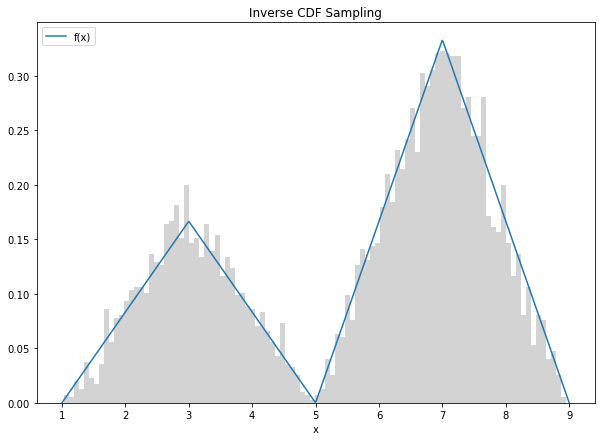

In [15]:
x = np.linspace(1,9,500)

plt.figure(figsize = (10,7))
plt.plot(x, f_vec(x), label='f(x)')
plt.hist(inverse_cdf_samples, bins=100, density=True, color='lightgray')
plt.xlabel('x')
plt.title('Inverse CDF Sampling')
plt.legend(loc="upper left")
plt.show()

<font color='#00007B'>
    
The histogram shows that 5000 samples from our naive CDF sampling monte carlo samplers is well aligned with our pdf distribution, with more density of samples around $x=3$ and $x=5$, and less density of samples around $x=5$ and $x=1$ and $x=9$. It may have high variance though, we will talk more on variance in question 3.

Text(0.5, 1.0, 'Rejection Sampling with Normal')

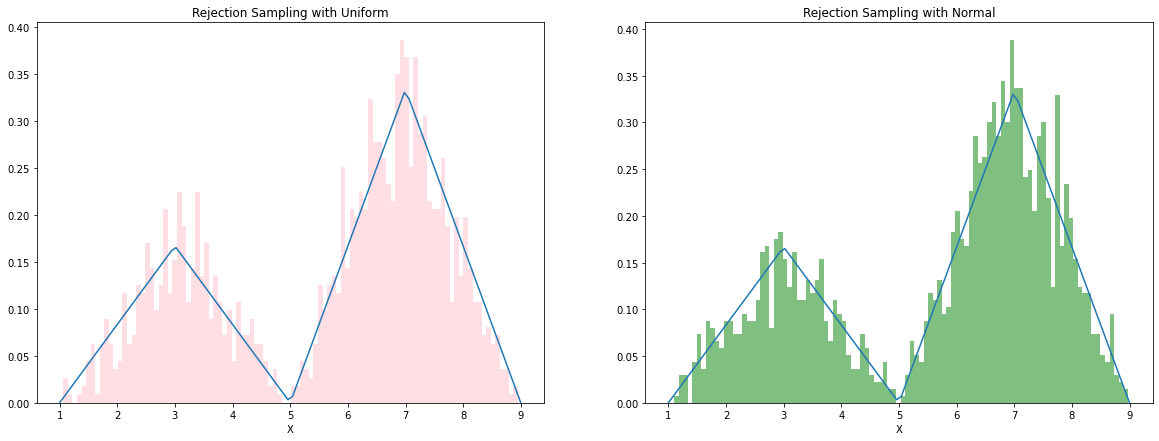

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
x = np.linspace(1, 9, 100)

ax[0].plot(x, f_vec(x),  label='f(x)')
ax[0].hist(uniform_rej_sampling, bins=100, density=True, color='pink', alpha=0.5, linewidth=1)
ax[0].set_xlabel('X')
ax[0].set_title('Rejection Sampling with Uniform')

ax[1].plot(x, f_vec(x),  label='f(x)')
ax[1].hist(normal_rej_sampling, bins=100, density=True, color='green', alpha=0.5, linewidth=1)
ax[1].set_xlabel('X')
ax[1].set_title('Rejection Sampling with Normal')

<font color='#00007B'>
    
*What does the comparison say about the quality of your samples? In particular, which sampler (and which proposal distribution) produces "better" samples? Is this surprising -- i.e. use some properties of these samplers discussed in class to explain the patterns you're observing?*
    
Comparing both sampling method for rejection sampling, it seems both of them have high variance, while the highest appear around $x=3$ and $x=7$. Uniform rejection sampling produces slightly higher variance of samples than normal distribution based on the peak in both triangles. This may be due to that normal distribution varies similarly with $h(x)*f(x)$ distribution.
    
This may make sense when we refer back to acceptance rate, and sample size we see from question 1, Uniform Rejection Sampling Acceptance Rate: $28.60\%$; and Normal Rejection Sampling Acceptance Rate: $33.54\%$. So there will be larger sample size for normal distribution rejection sampling, thus result in slightly less variance, and better sample shape.

# Q2. Importance Weightage

Text(0.5, 1.0, 'Importance Weight with Normal')

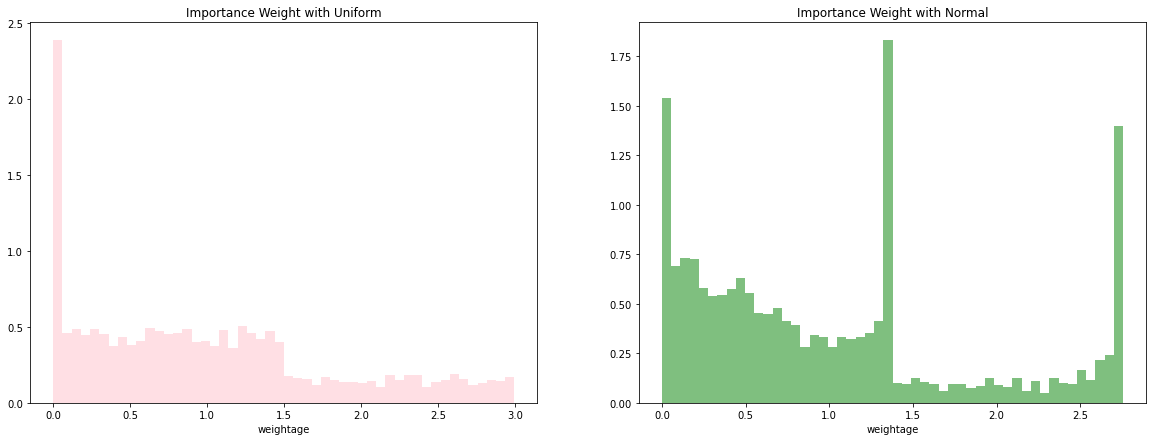

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
x = np.linspace(1, 9, 100)

ax[0].hist(uniform_imp_weight, bins=50, density=True, color='pink', alpha=0.5, linewidth=1)
ax[0].set_xlabel('weightage')
ax[0].set_title('Importance Weight with Uniform')

ax[1].hist(normal_imp_weight, bins=50, density=True, color='green', alpha=0.5, linewidth=1)
ax[1].set_xlabel('weightage')
ax[1].set_title('Importance Weight with Normal')

<font color='#00007B'>

*Is the weight distribution surprising -- i.e. use some properties of these samplers discussed in class to explain the patterns you're observing?*
    
I think the weight distribution is as expected. Importance weightage with normal distribution is more heterogenous  with weight variations ups and downs in weight range $[0,1.5]$; while importance weightage with uniform distribution is more chopped. Both importance weightage graphs have a significant amount of weightage around 0, showing there are a bunch of value from proposed distribution that are unlikely to appear in target nominal distribution $f(x)$. There are also more density of weightage around $[0, 1.5]$ for both distributions, showing value from proposal distribution to nominal distribution are similar in the range of $[0, 1.5]$, instead of far larger value than nominal distribution (which way will have a lot of huge weights).

    
    
We know that importance weight $\frac{p(\theta_s|Y)}{q(\theta_s)}$ where $q$ is the ***importance distribution***, $p$ the ***nominal distribution***. 
 
Let plot $x$ along with $f_X$ and $h$ to compare our importance distribution and nominal distribution.


Next, we visualize the importance distributions along with $f_X$ and $h$ in your analysis of importance sampling

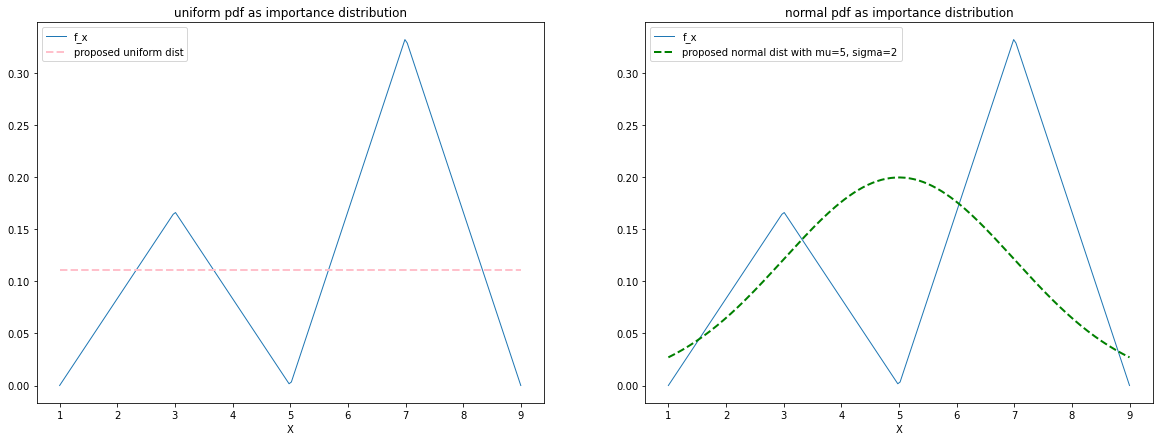

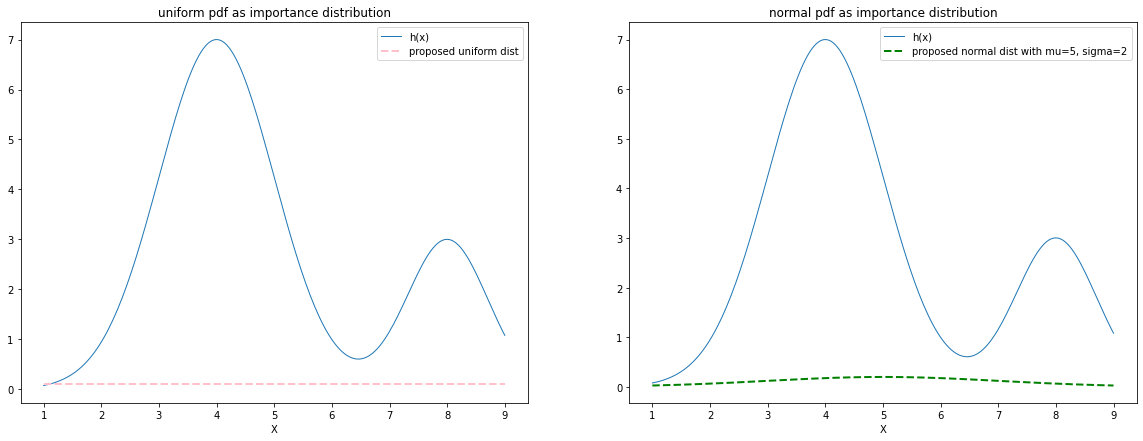

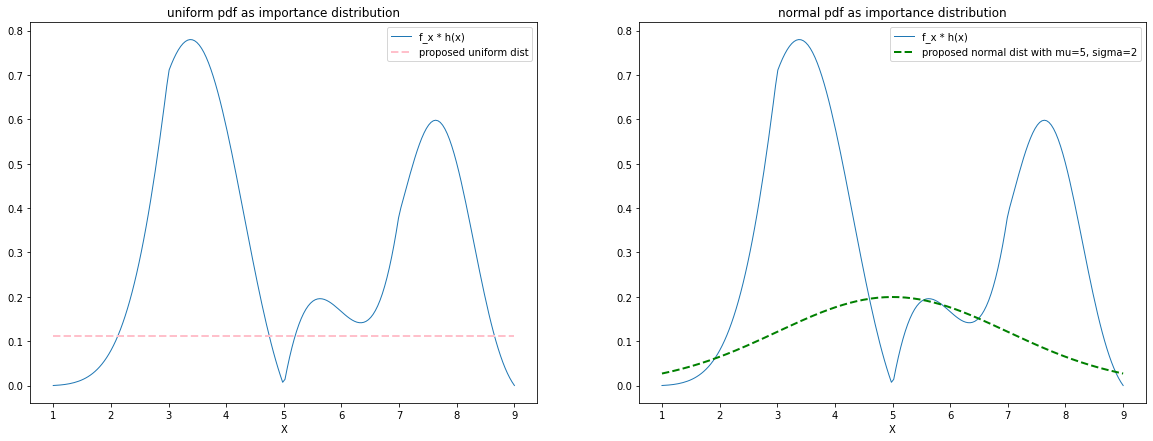

In [18]:

fig, ax = plt.subplots(1, 2, figsize=(20, 7))
x = np.linspace(1, 9, 200)
ax[0].plot(x, f_vec(x), linewidth=1, label='f_x')
ax[0].plot(x, proposal_pdf_uniform(x), '--', color='pink', linewidth=2, label='proposed uniform dist')
ax[0].set_xlabel('X')
ax[0].set_title('uniform pdf as importance distribution')
ax[0].legend(loc='best')

ax[1].plot(x, f_vec(x), linewidth=1, label='f_x')
ax[1].plot(x, proposal_pdf_normal(x), '--', color='green', linewidth=2, label='proposed normal dist with mu={}, sigma={}'.format(5, 2))
ax[1].set_xlabel('X')
ax[1].set_title('normal pdf as importance distribution')
ax[1].legend(loc='best')
plt.show()


fig, ax = plt.subplots(1, 2, figsize=(20, 7))
x = np.linspace(1, 9, 200)
ax[0].plot(x, h(x), linewidth=1, label='h(x)')
ax[0].plot(x, proposal_pdf_uniform(x), '--', color='pink', linewidth=2, label='proposed uniform dist')
ax[0].set_xlabel('X')
ax[0].set_title('uniform pdf as importance distribution')
ax[0].legend(loc='best')

ax[1].plot(x, h(x), linewidth=1, label='h(x)')
ax[1].plot(x, proposal_pdf_normal(x), '--', color='green', linewidth=2, label='proposed normal dist with mu={}, sigma={}'.format(5, 2))
ax[1].set_xlabel('X')
ax[1].set_title('normal pdf as importance distribution')
ax[1].legend(loc='best')
plt.show()


fig, ax = plt.subplots(1, 2, figsize=(20, 7))
x = np.linspace(1, 9, 200)
ax[0].plot(x, f_vec(x) * h(x), linewidth=1, label='f_x * h(x)')
ax[0].plot(x, proposal_pdf_uniform(x), '--', color='pink', linewidth=2, label='proposed uniform dist')
ax[0].set_xlabel('X')
ax[0].set_title('uniform pdf as importance distribution')
ax[0].legend(loc='best')

ax[1].plot(x, f_vec(x) * h(x), linewidth=1, label='f_x * h(x)')
ax[1].plot(x, proposal_pdf_normal(x), '--', color='green', linewidth=2, label='proposed normal dist with mu={}, sigma={}'.format(5, 2))
ax[1].set_xlabel('X')
ax[1].set_title('normal pdf as importance distribution')
ax[1].legend(loc='best')
plt.show()

<font color='#00007B'>
    
* *Is the weight distribution surprising -- i.e. use some properties of these samplers discussed in class to explain the patterns you're observing?*
    
The comparison between nominal distribution and proposed importance distribution corresponds to what we observed in the above plot, there's a smoother weightage between normal importance distribution to nominal distribution, comparing to uniform distribution. In uniform distribution's importance sampling, we can see the proposed importance distribution is constant throughout the way, causing all levels of different importance weightage and ratio, evenly distribute out throughout. While in normal distribution, there's some portion of importance distribution that rise together with nominal distribution, so it leads to different density of weightages, some weightage appears more and some appears less.

When $q$ and $p$ are very dissimilar, the weightage will be heterogeneous, either 0 or huge. 
    
    
* *What do these importance weights tell you about the quality of your importance sampling estimate?*
    
From importance weights, we can see how many samples are we effectively simulating from $p$. A way to measure the "quality" of the samples from $p$ in estimating $I$, is through the effective sample size.
Since in our plot, we see that importance weightage are spamming through whole range, not all centered from $0$ or being very large. They are reasonably spreaded out, so we can say that the quality of our importance sampling estimate is reasonably good.


# Q3. Samples Across Strata

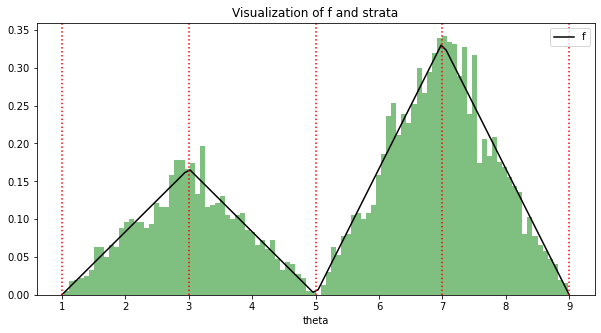

In [19]:
#end points of the strata
strata = [1,3,5,7,9]

x = np.linspace(1, 9, 100)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, f_vec(x), color='black', label='f')
ax.hist(stratified_samples, bins=100, density=True, color='green', alpha=0.5, linewidth=0)


for stratus in strata:
    ax.axvline(x=stratus, linestyle=':', color='red')
ax.set_title('Visualization of f and strata')
ax.set_xlabel('theta')
ax.legend(loc='best')
plt.show()

<font color='#00007B'>
    
This plot shows the distribution of all the samples across strata, and it makes sense. We see more samples from the x in range [5,9] and less samples from x in range [1,5], which corresponds to the weightage in 4 stratas.

However, another thing we need to consider for property of stratified sampling is that based on our realization that "flat" functions have lower variance, we will try to partition the domain of $h$ into regions where $h$ is relatively "flat". We estimate the integral on each piece of the partition then sum over the pieces to reduce variance. 
    
Thus, we could plot $h(x)$ over stratas and samples and see. 

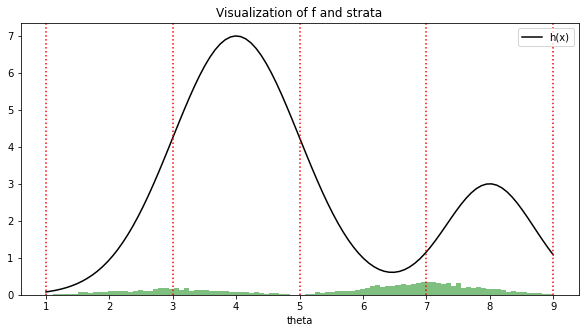

In [20]:
#end points of the strata
strata = [1,3,5,7,9]

x = np.linspace(1, 9, 100)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, h(x), color='black', label='h(x)')
ax.hist(stratified_samples, bins=100, density=True, color='green', alpha=0.5, linewidth=0)


for stratus in strata:
    ax.axvline(x=stratus, linestyle=':', color='red')
ax.set_title('Visualization of f and strata')
ax.set_xlabel('theta')
ax.legend(loc='best')
plt.show()

<font color='#00007B'>

The plot shows that stratified sampling divides $h(x)$ into sub regions that has less variations and are relatively more flat. Thus, we could expect that variance should be reduced by stratified sampling here. (See below in question 3 for more details of variance)

---

## Part III: Variance Reduction

1. Compute the sample variance of the four Monte Carlo estimates in Part I. Based on the discussions in lecture, which sampling methods (and proposal/importance distributions) is expected, in principle, to resulted in lower variances? How well do your results align with these expectations?<br><br>

3. Based on your experiments, would you feel comfortable concluding which type of Monte Carlo estimate will **generally** have the lowest variance? Why or why not?

# Q1. Sample Variance

For obtaining sample variance, we need to rerun the above samplers for several times and get a series of Monte Carlo Mean Estimation, then calculate their variance.

In [21]:
# repeat sampler for N times of simulations
N = 5000
S = 1000


inverse_cdf_sampling_estimates = [inverse_cdf_sampling(S)[1] for i in range(N)]
uniform_rej_sampling_estimates = [rejection_sampling(target_pdf, proposal_pdf_uniform, S = S, M = m1, normal_distribution = False)[1] for i in range(N)]
normal_rej_sampling_estimates = [rejection_sampling(target_pdf, proposal_pdf_normal, S = S, M = m2, normal_distribution = True)[1] for i in range(N)]
uniform_imp_sampling_estimates= [importance_sampling(target_pdf, proposal_pdf_uniform, S = S, normal_distribution = False)[1] for i in range(N)]
normal_imp_sampling_estimates = [importance_sampling(target_pdf, proposal_pdf_normal, S = S, normal_distribution = True)[1] for i in range(N)]
stratified_sampling_estimates = [stratified_sampling(S)[1] for i in range(N)]

In [22]:
inverse_cdf_sampling_estimates_var = np.var(inverse_cdf_sampling_estimates)
uniform_rej_sampling_estimates_var = np.var(uniform_rej_sampling_estimates)
normal_rej_sampling_estimates_var = np.var(normal_rej_sampling_estimates)
uniform_imp_sampling_estimates_var = np.var(uniform_imp_sampling_estimates)
normal_imp_sampling_estimates_var = np.var(normal_imp_sampling_estimates)
stratified_sampling_estimates_var = np.var(stratified_sampling_estimates)

In [23]:
print("inverse cdf sampling estimates variance is %.4f"%inverse_cdf_sampling_estimates_var)
print("uniform rej sampling estimates variance is %.4f"%uniform_rej_sampling_estimates_var)
print("normal rej sampling estimates variance is %.4f"%normal_rej_sampling_estimates_var)
print("uniform imp sampling estimates variance is %.4f"%uniform_imp_sampling_estimates_var)
print("normal imp sampling estimates variance is %.4f"%normal_imp_sampling_estimates_var)
print("stratified sampling estimates variance is %.4f"%stratified_sampling_estimates_var)

inverse cdf sampling estimates variance is 0.0034
uniform rej sampling estimates variance is 0.0118
normal rej sampling estimates variance is 0.0102
uniform imp sampling estimates variance is 0.0048
normal imp sampling estimates variance is 0.0047
stratified sampling estimates variance is 0.0006


In [24]:
inverse_cdf_sampling_estimates_mean = np.mean(inverse_cdf_sampling_estimates)
uniform_rej_sampling_estimates_mean = np.mean(uniform_rej_sampling_estimates)
normal_rej_sampling_estimates_mean= np.mean(normal_rej_sampling_estimates)
uniform_imp_sampling_estimates_mean = np.mean(uniform_imp_sampling_estimates)
normal_imp_sampling_estimates_mean = np.mean(normal_imp_sampling_estimates)
stratified_sampling_estimates_mean = np.mean(stratified_sampling_estimates)

In [25]:
print("inverse cdf sampling estimates mean is %.4f"%inverse_cdf_sampling_estimates_mean)
print("uniform rej sampling estimates mean is %.4f"%uniform_rej_sampling_estimates_mean)
print("normal rej sampling estimates mean is %.4f"%normal_rej_sampling_estimates_mean)
print("uniform imp sampling estimates mean is %.4f"%uniform_imp_sampling_estimates_mean)
print("normal imp sampling estimates mean is %.4f"%normal_imp_sampling_estimates_mean)
print("stratified sampling estimates mean is %.4f"%stratified_sampling_estimates_mean)

inverse cdf sampling estimates mean is 2.4378
uniform rej sampling estimates mean is 2.4360
normal rej sampling estimates mean is 2.4395
uniform imp sampling estimates mean is 2.4361
normal imp sampling estimates mean is 2.4376
stratified sampling estimates mean is 2.4389


<font color='#00007B'>
    
Here is a summary of the variance results 

|   Samplers   |   Mean of Estimations   |   Variance of Estimations |
| :--- | :---: | :---: |
| Inverse CDF | 2.4378 | 0.0034
| Rejection w U(1,9) with M=$3.5$| 2.4360 | 0.0118
| Rejection w N(5,2) with M=3| 2.4395 | 0.0102
| Importance w U(1,9) | 2.4361 | 0.0048
| Importance w N(5,2) | 2.4376 |  0.0047
| Stratified with [1,3,5,6,9] | 2.4389 | 0.0006

<br>
    
The result aligns with expectation.
As we can see from the above summary, the mean of each method's Monte Carlo estimations are roughly the same. Comparing across the table for variance, we can see that the stratified sampling with end points [1,3,5,6,9] and 4 stratas has the lowest variance, and the Importance sampling with importance distribution $U(1,9)$ has the highest variance. 

The reason why Stratified sampling has lowest variance is that by 'slicing' $h$ to obtain 4 stratas, each strata are independent of others and have a flatter shape than original $h$, which results in variance reduction and overall lower overal variance. As we talked above in question 2's plot shows that stratified sampling divides $h(x)$ into sub regions that has less variations and are relatively more flat. Thus, we could expect that variance should be reduced by stratified sampling here. 
    
    
The variance of Rejection Sampling are largely dependent on choices of proposal distribution. Rejection Sampling has way smaller sample size than others, as it only accepts around $30\%$ of samples, thus they have higher variance. And as we discussed above, acceptance rate of normal proposed distribution is higher than uniform distribution, thus the variance of rejection sampling with $N(5,2)$ is slightly lower than rejection sampling with $U(1,9)$.
    
For importance sampling, as we didn't reject anything, just by calculating weight comparing to target distribution, we obtain similar variance in Importance Sampling with inverse CDF sampler. Though, they are slightly higher than naive CDF inverse monte carlo method. This may be due to our choice of $q$ distribution. As we observe in weightage plot, both plot have heterogeneous weightage density, which may not be ideal for variance reduction. Thus it results in higher variance than CDF inverse method.

# Q2. Generalization of Lowest Variance

<font color='#00007B'>
    
I do not feel comfortable to make a concluding statement over which type of Monte Carlo estimate will generally have the lowest variance, by a single set of experiment. 

If we choose different distributions for rejection and importance sampling, it could result in different variance. A bad selection may introduce more variance in estimations. Besides, stratified sampling may also depends heavily on its end point and strata selections. Thus, it is not rationale to conclude which method will generally be better than the rest.

